In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def imshow(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [18]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [19]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [20]:
def otsu(hist):
    tot = np.sum(hist)
    prob = hist/tot
    coef_max = -1
    thr = -1
    for t in range(1,255):
        w0 = np.sum(prob[:t]) + 0.00000001
        w1 = np.sum(prob[t:]) + 0.00000001
        i0 = np.array([i for i in range(t)])
        i1 = np.array([i for i in range(t,256)])
        u0 = np.sum(i0*prob[:t])/w0
        u1 = np.sum(i1*prob[t:])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

In [21]:
def intermean(hist, t):
    tot = np.sum(hist)
    prob = hist/tot
    w0 = np.sum(prob[:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:])
    w1 = (1 - w0) + 0.0000001
    i0 = np.array([i for i in range(0,t+1)])
    i1 = np.array([i for i in range(t+1, 256)])
    u0 = np.sum(i0*prob[:t+1])/w0
    u1 = np.sum(i1*prob[t+1:])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)

In [22]:
def gamma_correction(img, gamma):
    img = img.astype(np.float64)/np.amax(img)
    gamma_img = img**gamma
    return np.array(255*gamma_img, dtype = 'uint8')

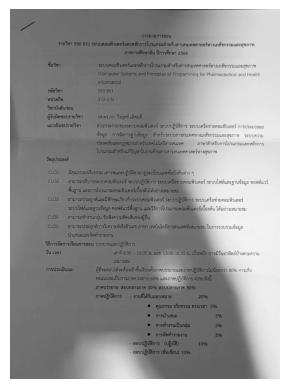

In [23]:
img = cv2.imread('./images/document.jpg', 0)
imshow(img)

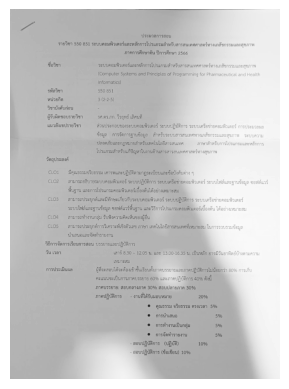

In [24]:
gamma = gamma_correction(img, 0.43)
imshow(gamma)

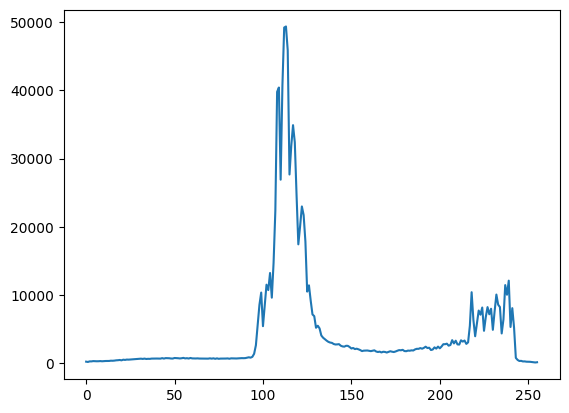

In [25]:
hist = hist_img_v0(img)
plt.plot(hist)

## intermean

In [26]:
t0 = 10
tol = 1
flag = True
T = []
T.append(t0)
while(flag):
    t1 = intermean(hist, t0)
    T.append(t1)
    if abs(t1-t0) <= tol :
        flag = False
    else:
        t0 = t1
thr = T[-1]
print(T, thr)

[10, 72, 92, 98, 104, 114, 134, 156, 163, 164] 164


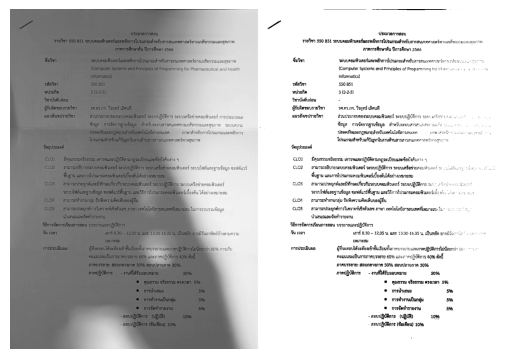

In [27]:
out_intermean = np.zeros_like(img)
out_intermean[gamma > thr] = 255
out_intermean[gamma <= thr] = 0
result_intermean = cv2.hconcat([img, out_intermean])
imshow(result_intermean)
plt.savefig('./outs/hw2_intermean.png')

## otsu

In [28]:
thr = otsu(hist)
print(thr)

165


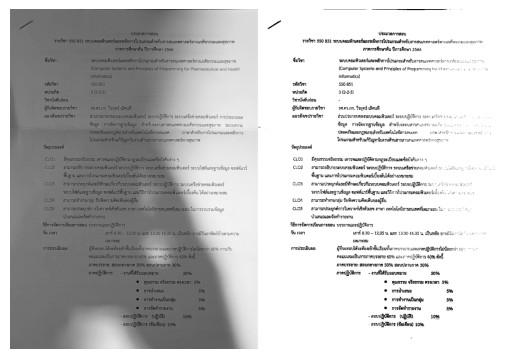

In [29]:
out_otsu = np.zeros_like(img)
out_otsu[gamma > thr] = 255
out_otsu[gamma <= thr] = 0
result_otsu = cv2.hconcat([img, out_otsu])
imshow(result_otsu)
plt.savefig('./outs/hw2_otsu.png')